In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Good Man,2012
1,Atletu,2009
2,"Ba-da jjok-eu-ro, han bbyeom Deo",2009
3,Terr'ble Tessie,1966
4,66/67,2009


In [8]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [24]:
t = cast[(cast.character == 'Batman') | (cast.character == 'Superman')].groupby(['year', 'character']).size()
t = t.unstack().fillna(0)
(t.Batman < t.Superman).value_counts()

False    36
True     11
dtype: int64

### How many years have been "Batman years", with more Batman characters than Superman characters?

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

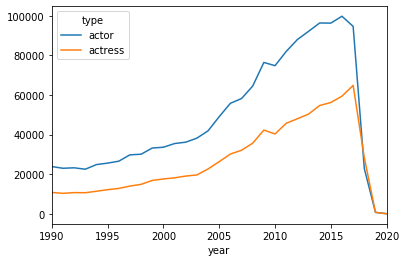

In [33]:
cast.groupby(['type', 'year']).size().unstack(0).fillna(0).plot(xlim=(1990, 2020))

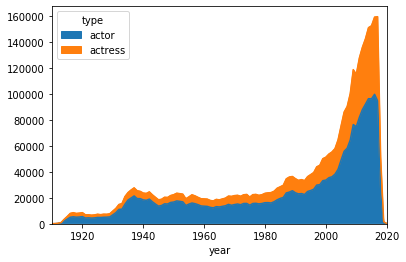

In [44]:
cast.groupby(['type', 'year']).size().unstack(0).fillna(0).plot(xlim=(1910, 2020), kind='area')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

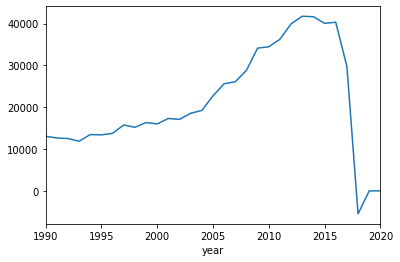

In [45]:
p = cast.groupby(['type', 'year']).size().unstack(0).fillna(0)
c = p.actor - p.actress
c.plot(xlim=(1990, 2020))

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

year
1894    0.666667
1900    1.000000
1905    1.000000
1906    0.823529
1907    1.000000
          ...   
2022    0.750000
2023    1.000000
2024    0.600000
2025    0.555556
2115    0.666667
Length: 124, dtype: float64

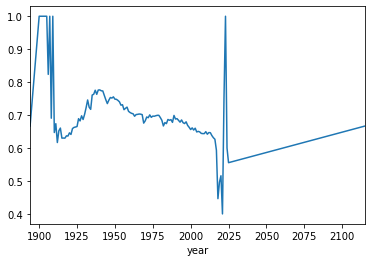

In [50]:
p = cast.groupby(['type', 'year']).size().unstack(0).fillna(0)
p = p.actor /(p.actor + p.actress)
p.plot()
p

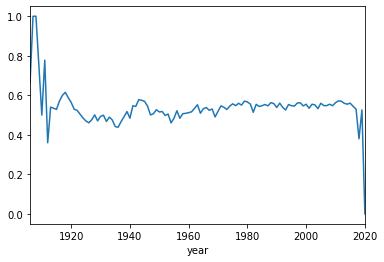

In [51]:
p = cast[cast.n ==2].groupby(['type', 'year']).size().unstack(0).fillna(0)
p = p.actor /(p.actor + p.actress)
p.plot()


### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

n,1.0,2.0,3.0
year,,,
1906,0.666667,0.666667,0.000000
1907,1.000000,1.000000,1.000000
1908,1.000000,1.000000,1.000000
1909,1.000000,0.000000,0.000000
1910,0.200000,0.500000,1.000000
...,...,...,...
2016,0.662678,0.544208,0.575946
2017,0.595734,0.530169,0.562646
2018,0.432265,0.380110,0.394805


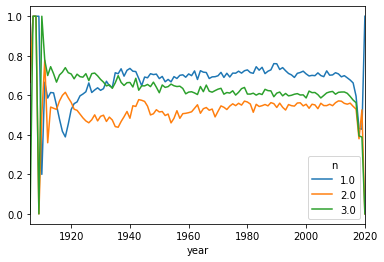

In [60]:
p = cast[cast.n <=3].groupby(['type', 'n', 'year']).size().unstack('type').unstack('n').fillna(0)
p = p.actor /(p.actor + p.actress)
p = p.fillna(0)
p.plot()
p

In [61]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
c

type      actor  actress
year n                  
1906 1.0    2.0      1.0
     2.0    2.0      1.0
     3.0    0.0      1.0
1907 1.0    1.0      0.0
     2.0    1.0      0.0
...         ...      ...
2019 1.0   12.0     16.0
     2.0   10.0      9.0
     3.0    7.0     11.0
2020 1.0    4.0      0.0
     2.0    0.0      1.0

[342 rows x 2 columns]